In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
                              BaggingClassifier, VotingClassifier, StackingClassifier)
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

In [50]:
df_data = pd.read_csv('dataf.csv')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          16096 non-null  object 
 1   cons_12m                                    16069 non-null  float64
 2   cons_gas_12m                                16090 non-null  float64
 3   cons_last_month                             16050 non-null  float64
 4   date_activ                                  16096 non-null  object 
 5   date_end                                    16096 non-null  object 
 6   date_modif_prod                             16096 non-null  object 
 7   date_renewal                                16096 non-null  object 
 8   forecast_cons_12m                           16055 non-null  float64
 9   forecast_cons_year                          16071 non-null  float64
 10  forecast_d

In [51]:
df_year = pd.read_csv('avg_year.csv')
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16094 entries, 0 to 16093
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      16094 non-null  object 
 1   p1_var  16094 non-null  float64
 2   p2_var  16094 non-null  float64
 3   p3_var  16094 non-null  float64
 4   p1_fix  16094 non-null  float64
 5   p2_fix  16094 non-null  float64
 6   p3_fix  16094 non-null  float64
dtypes: float64(6), object(1)
memory usage: 880.3+ KB


In [52]:
df_6m = pd.read_csv('avg_6m.csv')
df_6m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16094 entries, 0 to 16093
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           16094 non-null  object 
 1   p1_var_6m    16094 non-null  float64
 2   p2_var_6m    16094 non-null  float64
 3   p3_var_6m    16094 non-null  float64
 4   p1_fix_6m    16094 non-null  float64
 5   p2_fix_6m    16094 non-null  float64
 6   p3_fix_6m    16094 non-null  float64
 7   price_p1_6m  16094 non-null  float64
 8   price_p2_6m  16094 non-null  float64
 9   price_p3_6m  16094 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [53]:
df_3m = pd.read_csv('avg_3m.csv')
df_3m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16094 entries, 0 to 16093
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           16094 non-null  object 
 1   p1_var_3m    16094 non-null  float64
 2   p2_var_3m    16094 non-null  float64
 3   p3_var_3m    16094 non-null  float64
 4   p1_fix_3m    16094 non-null  float64
 5   p2_fix_3m    16094 non-null  float64
 6   p3_fix_3m    16094 non-null  float64
 7   price_p1_3m  16094 non-null  float64
 8   price_p2_3m  16094 non-null  float64
 9   price_p3_3m  16094 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [54]:
df_datan = df_data.drop(df_data.select_dtypes(include = 'object').columns, axis = 1)
df_datan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cons_12m                                    16069 non-null  float64
 1   cons_gas_12m                                16090 non-null  float64
 2   cons_last_month                             16050 non-null  float64
 3   forecast_cons_12m                           16055 non-null  float64
 4   forecast_cons_year                          16071 non-null  float64
 5   forecast_discount_energy                    16096 non-null  float64
 6   forecast_meter_rent_12m                     16092 non-null  float64
 7   forecast_price_energy_p1                    16096 non-null  float64
 8   forecast_price_energy_p2                    16096 non-null  float64
 9   forecast_price_pow_p1                       16096 non-null  float64
 10  imp_cons  

In [55]:
imputer = KNNImputer(n_neighbors = 5)
dfi = pd.DataFrame(imputer.fit_transform(df_datan), columns = df_datan.columns)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cons_12m                                    16096 non-null  float64
 1   cons_gas_12m                                16096 non-null  float64
 2   cons_last_month                             16096 non-null  float64
 3   forecast_cons_12m                           16096 non-null  float64
 4   forecast_cons_year                          16096 non-null  float64
 5   forecast_discount_energy                    16096 non-null  float64
 6   forecast_meter_rent_12m                     16096 non-null  float64
 7   forecast_price_energy_p1                    16096 non-null  float64
 8   forecast_price_energy_p2                    16096 non-null  float64
 9   forecast_price_pow_p1                       16096 non-null  float64
 10  imp_cons  

In [56]:
dfi = pd.concat([df_data['id'], dfi], axis = 1)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          16096 non-null  object 
 1   cons_12m                                    16096 non-null  float64
 2   cons_gas_12m                                16096 non-null  float64
 3   cons_last_month                             16096 non-null  float64
 4   forecast_cons_12m                           16096 non-null  float64
 5   forecast_cons_year                          16096 non-null  float64
 6   forecast_discount_energy                    16096 non-null  float64
 7   forecast_meter_rent_12m                     16096 non-null  float64
 8   forecast_price_energy_p1                    16096 non-null  float64
 9   forecast_price_energy_p2                    16096 non-null  float64
 10  forecast_p

In [59]:
df_combine = pd.merge(dfi, df_6m, left_on = 'id', right_on = 'id')
df_combine.shape

(16094, 40)

In [61]:
df_combine = pd.merge(df_combine, df_year, left_on = 'id', right_on = 'id')
df_combine.shape

(16094, 46)

In [62]:
df_combine = pd.merge(df_combine, df_3m, left_on = 'id', right_on = 'id')
df_combine.shape

(16094, 55)

In [63]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 16093
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          16094 non-null  object 
 1   cons_12m                                    16094 non-null  float64
 2   cons_gas_12m                                16094 non-null  float64
 3   cons_last_month                             16094 non-null  float64
 4   forecast_cons_12m                           16094 non-null  float64
 5   forecast_cons_year                          16094 non-null  float64
 6   forecast_discount_energy                    16094 non-null  float64
 7   forecast_meter_rent_12m                     16094 non-null  float64
 8   forecast_price_energy_p1                    16094 non-null  float64
 9   forecast_price_energy_p2                    16094 non-null  float64
 10  forecast_p

In [65]:
df_combine.isnull().sum()[df_combine.isnull().sum() > 0]

Series([], dtype: int64)

In [69]:
dfn = df_combine.drop(['id', 'has_gas_t', 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
                      'origin_up_ldkssxwpmemidmecebumciepifcamkci', 'origin_up_lxidpiddsbxsbosboudacockeimpuepw',
                      'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'churn'], axis = 1)
dfn.shape

(16094, 48)

In [70]:
sc = StandardScaler()
dfs = sc.fit_transform(dfn)
dfs = pd.DataFrame(dfs, columns = dfn.columns)

## ---------------------------------------------------------------------------------

In [74]:
X = pd.concat([dfs, df_combine[['has_gas_t', 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
                      'origin_up_ldkssxwpmemidmecebumciepifcamkci', 'origin_up_lxidpiddsbxsbosboudacockeimpuepw',
                      'origin_up_usapbepcfoloekilkwsdiboslwaxobdp']]], axis = 1)
Y = df_combine['churn']
X.shape, Y.shape

((16094, 53), (16094,))

In [77]:
Y.value_counts()

0.0    14500
1.0     1594
Name: churn, dtype: int64

In [75]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, stratify = Y, test_size = 0.3)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((11265, 53), (4829, 53), (11265,), (4829,))

In [106]:
kf = KFold(n_splits = 5, shuffle = True)

In [226]:
lr = LogisticRegression(max_iter = 300)
lr_boost = AdaBoostClassifier(base_estimator = lr)
lr_bag = BaggingClassifier(base_estimator = lr)
nb = GaussianNB()
nb_boost = AdaBoostClassifier(base_estimator = nb)
nb_bag = BaggingClassifier(base_estimator = nb)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
dt_boost = AdaBoostClassifier()
rf = RandomForestClassifier(n_jobs = -1)
gb = GradientBoostingClassifier()
xgb = XGBClassifier(n_jobs = -1)
svc = SVC()

models = []
models.append(['LR', lr])
models.append(['LR_boost', lr_boost])
models.append(['LR_bag', lr_bag])
models.append(['NB', nb])
models.append(['NB_boost', nb_boost])
models.append(['NB_bag', nb_bag])
models.append(['KNN', knn])
models.append(['DT', dt])
models.append(['DT_boost', dt_boost])
models.append(['RF', lr])
models.append(['GB', gb])
models.append(['XGB', lr])
models.append(['SVC', svc])

In [203]:
names = []
modls = []
scores = []
be = []
ve = []
for name, modl in models:
    print(name)
    names.append(name)
    modls.append(modl)
    score = cross_val_score(modl, xtrain, ytrain, cv = kf, scoring = 'roc_auc')
    scores.append(score)
    be.append(np.mean(1 - score))
    ve.append(np.std(score))

LR
LR_boost
LR_bag
NB
NB_boost
NB_bag
KNN
DT
DT_boost
RF
GB
XGB


In [204]:
scorecard = pd.DataFrame()
scorecard['Models'] = names
scorecard['Bias Error'] = be
scorecard['Variance Error'] = ve
scorecard

,Models,Bias Error,Variance Error
0,LR,0.351991,0.017433
1,LR_boost,0.348880,0.004197
2,LR_bag,0.356031,0.019436
3,NB,0.390398,0.008591
4,NB_boost,0.475788,0.030119
5,NB_bag,0.389145,0.025656
6,KNN,0.411483,0.020079
7,DT,0.444355,0.023155
8,DT_boost,0.343465,0.015962
9,RF,0.355661,0.017915


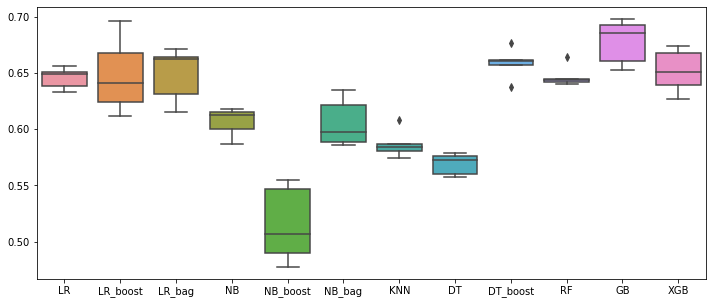

In [108]:
plt.figure(figsize = (12,5))
sns.boxplot(x = names, y = scores)
plt.show()

In [206]:
scorecard.sort_values(by = ['Bias Error', 'Variance Error'])

,Models,Bias Error,Variance Error
10,GB,0.317273,0.006334
8,DT_boost,0.343465,0.015962
1,LR_boost,0.348880,0.004197
0,LR,0.351991,0.017433
11,XGB,0.354436,0.026050
9,RF,0.355661,0.017915
2,LR_bag,0.356031,0.019436
5,NB_bag,0.389145,0.025656
3,NB,0.390398,0.008591
6,KNN,0.411483,0.020079


In [207]:
scorecard.sort_values(by = ['Variance Error', 'Bias Error'])

,Models,Bias Error,Variance Error
1,LR_boost,0.348880,0.004197
10,GB,0.317273,0.006334
3,NB,0.390398,0.008591
8,DT_boost,0.343465,0.015962
0,LR,0.351991,0.017433
9,RF,0.355661,0.017915
2,LR_bag,0.356031,0.019436
6,KNN,0.411483,0.020079
7,DT,0.444355,0.023155
5,NB_bag,0.389145,0.025656


In [101]:
skf = StratifiedKFold(n_splits = 5)

In [104]:
names = []
modls = []
scores = []
for name, modl in models:
    names.append(name)
    modls.append(modl)
    score = cross_val_score(modl, xtrain, ytrain, cv = skf, scoring = 'roc_auc')
    scores.append(score)

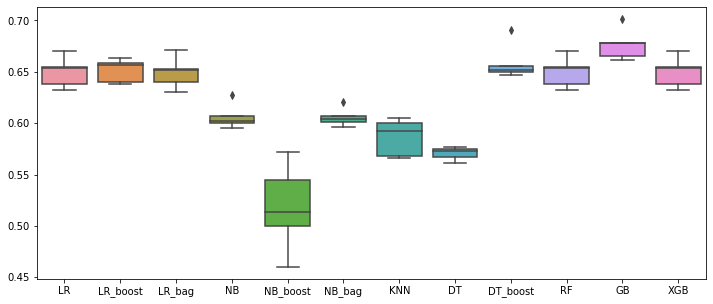

In [105]:
plt.figure(figsize = (12,5))
sns.boxplot(x = names, y = scores)
plt.show()

In [254]:
def model_score(models, xtrain, ytrain):
    names = []
    modls = []
    scores = []
    be = []
    ve = []
    avg_roc_auc = []

    for name, modl in models:
        names.append(name)
        modls.append(modl)
        score = cross_val_score(modl, xtrain, ytrain, cv = skf, scoring = 'roc_auc')
        scores.append(score)
        be.append(np.mean(1 - score))
        ve.append(np.std(score))
        avg_roc_auc.append(np.median(score))
    return names, scores, be, ve, avg_roc_auc

In [169]:
def model_vis(names, scores):
    plt.figure(figsize = (12,5))
    sns.boxplot(x = names, y = scores)
    plt.show()

In [239]:
def scorecards(names, be, ve, avg_roc_auc):
    scorecard = pd.DataFrame()
    scorecard['Models'] = names
    scorecard['ROC_AUC'] = avg_roc_auc
    scorecard['Bias Error'] = be
    scorecard['Variance Error'] = ve
    return scorecard

## -------------------------------------------------------------------------------------

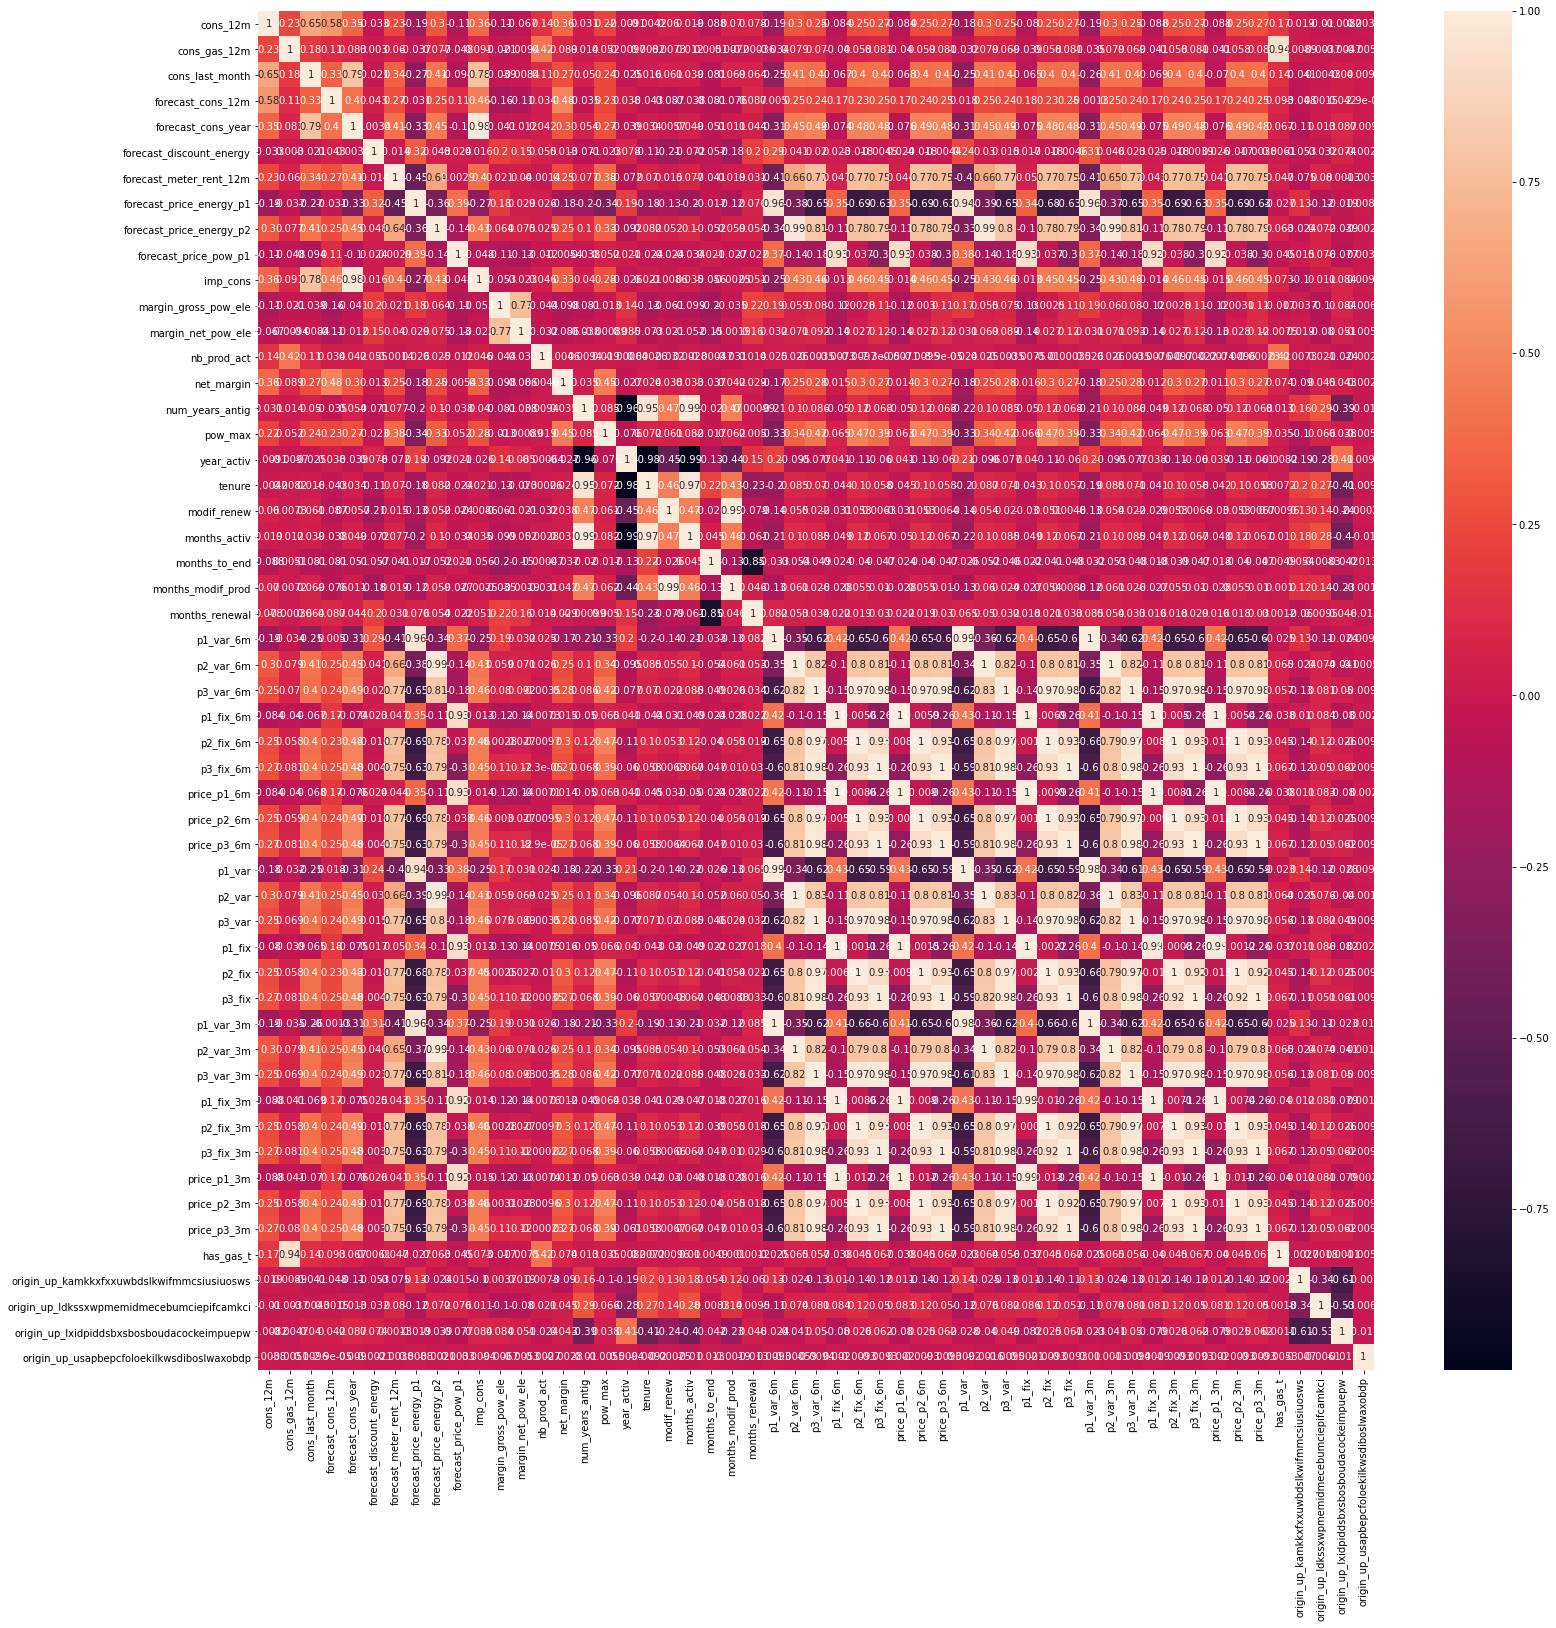

In [113]:
plt.figure(figsize = (25,25))
sns.heatmap(X.corr(), annot = True)
plt.show()

In [115]:
df_corr = X.corr()

In [118]:
for i in df_corr.columns:
    print(i)
    print(df_corr[abs(df_corr[i]) > 0.5][i].sort_values(ascending = False))
    print('_'*70)

cons_12m
cons_12m             1.000000
cons_last_month      0.645982
forecast_cons_12m    0.580125
Name: cons_12m, dtype: float64
______________________________________________________________________
cons_gas_12m
cons_gas_12m    1.000000
has_gas_t       0.941748
Name: cons_gas_12m, dtype: float64
______________________________________________________________________
cons_last_month
cons_last_month       1.000000
forecast_cons_year    0.788325
imp_cons              0.776561
cons_12m              0.645982
Name: cons_last_month, dtype: float64
______________________________________________________________________
forecast_cons_12m
forecast_cons_12m    1.000000
cons_12m             0.580125
Name: forecast_cons_12m, dtype: float64
______________________________________________________________________
forecast_cons_year
forecast_cons_year    1.000000
imp_cons              0.984616
cons_last_month       0.788325
Name: forecast_cons_year, dtype: float64
_______________________________________

In [165]:
inp = xtrain.copy()

In [166]:
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

C:\Users\anura\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
26,p3_var_6m,inf
43,p2_fix_3m,inf
32,price_p3_6m,inf
31,price_p2_6m,inf
30,price_p1_6m,inf


In [170]:
inp = inp.drop('p3_var_6m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

C:\Users\anura\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
26,p1_fix_6m,inf
43,p3_fix_3m,inf
30,price_p2_6m,inf
29,price_p1_6m,inf
27,p2_fix_6m,inf


In [171]:
inp = inp.drop('p1_fix_6m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

C:\Users\anura\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
25,p2_var_6m,inf
43,price_p1_3m,inf
29,price_p2_6m,inf
26,p2_fix_6m,inf
38,p2_var_3m,inf


In [172]:
inp = inp.drop('p2_var_6m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

C:\Users\anura\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
36,p1_var_3m,inf
41,p3_fix_3m,inf
44,price_p3_3m,inf
43,price_p2_3m,inf
37,p2_var_3m,inf


In [173]:
inp = inp.drop('p1_var_3m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

C:\Users\anura\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
36,p2_var_3m,inf
39,p2_fix_3m,inf
37,p3_var_3m,inf
43,price_p3_3m,inf
42,price_p2_3m,inf


In [174]:
inp = inp.drop('p2_var_3m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

C:\Users\anura\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
36,p3_var_3m,inf
42,price_p3_3m,inf
39,p3_fix_3m,inf
29,price_p3_6m,5.167749e+08
26,p3_fix_6m,5.147311e+08


In [175]:
inp = inp.drop('p3_var_3m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
29,price_p3_6m,5.167749e+08
26,p3_fix_6m,5.147311e+08
28,price_p2_6m,4.333266e+08
25,p2_fix_6m,4.309386e+08
41,price_p3_3m,3.260832e+08


In [176]:
inp = inp.drop('price_p3_6m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
28,price_p2_6m,3.708829e+08
25,p2_fix_6m,3.692165e+08
39,price_p2_3m,1.720302e+08
36,p2_fix_3m,1.716784e+08
40,price_p3_3m,6.272117e+07


In [177]:
inp = inp.drop('price_p2_6m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
39,price_p3_3m,6.108494e+07
36,p3_fix_3m,6.060836e+07
38,price_p2_3m,3.929696e+07
35,p2_fix_3m,3.926185e+07
34,p1_fix_3m,1.685491e+07


In [178]:
inp = inp.drop('price_p3_3m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
35,p2_fix_3m,3.433390e+07
38,price_p2_3m,3.421077e+07
34,p1_fix_3m,1.685077e+07
37,price_p1_3m,1.679236e+07
25,p2_fix_6m,1.004343e+05


In [179]:
inp = inp.drop('p2_fix_3m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
34,p1_fix_3m,1.538971e+07
36,price_p1_3m,1.533119e+07
25,p2_fix_6m,9.870030e+04
26,p3_fix_6m,8.125901e+04
32,p2_fix,4.048911e+04


In [180]:
inp = inp.drop('p1_fix_3m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
25,p2_fix_6m,97371.490668
26,p3_fix_6m,80762.797287
32,p2_fix,40489.075287
33,p3_fix,33401.916202
36,price_p2_3m,16563.609303


In [181]:
inp = inp.drop('p2_fix_6m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
19,modif_renew,6896.899005
22,months_modif_prod,6875.650662
33,p3_fix_3m,2799.520979
31,p2_fix,2778.836902
32,p3_fix,2769.208899


In [182]:
inp = inp.drop('modif_renew', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
32,p3_fix_3m,2798.983058
30,p2_fix,2778.806120
31,p3_fix,2769.180009
34,price_p2_3m,2675.518474
24,p3_fix_6m,1885.358718


In [183]:
inp = inp.drop('p3_fix_3m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
31,p3_fix,1602.619763
24,p3_fix_6m,1538.141118
30,p2_fix,914.406411
25,price_p1_6m,860.018248
33,price_p2_3m,802.957191


In [184]:
inp = inp.drop('p3_fix', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
25,price_p1_6m,831.949523
29,p1_fix,388.883613
30,p2_fix,362.876598
32,price_p2_3m,264.718484
31,price_p1_3m,214.550457


In [185]:
inp = inp.drop('price_p1_6m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
29,p2_fix,361.009138
31,price_p2_3m,263.010152
19,months_activ,189.942472
27,p3_var,139.743189
23,p1_var_6m,109.350733


In [186]:
inp = inp.drop('p2_fix', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
19,months_activ,189.679819
23,p1_var_6m,104.981351
27,p3_var,104.848896
28,p1_fix,92.890022
30,price_p2_3m,82.826391


In [187]:
inp = inp.drop('months_activ', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
22,p1_var_6m,104.884022
26,p3_var,104.833109
27,p1_fix,92.888281
29,price_p2_3m,82.147072
24,p1_var,79.350037


In [188]:
inp = inp.drop('p1_var_6m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
25,p3_var,104.142873
26,p1_fix,90.892388
28,price_p2_3m,82.128664
22,p3_fix_6m,70.440834
27,price_p1_3m,67.820726


In [189]:
inp = inp.drop('p3_var', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
25,p1_fix,89.714800
26,price_p1_3m,67.041891
27,price_p2_3m,66.397776
4,forecast_cons_year,50.703228
24,p2_var,49.887010


In [190]:
inp = inp.drop('p1_fix', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
26,price_p2_3m,64.803264
4,forecast_cons_year,50.336239
10,imp_cons,49.679062
24,p2_var,49.570277
8,forecast_price_energy_p2,44.475136


In [191]:
inp = inp.drop('price_p2_3m', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
24,p2_var,48.953289
4,forecast_cons_year,48.578014
10,imp_cons,48.378827
8,forecast_price_energy_p2,44.174643
18,tenure,42.586613


In [192]:
inp = inp.drop('p2_var', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
4,forecast_cons_year,48.559567
10,imp_cons,48.366488
18,tenure,42.583348
17,year_activ,28.968605
15,num_years_antig,26.851937


In [193]:
inp = inp.drop('forecast_cons_year', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
17,tenure,42.583177
16,year_activ,28.965724
14,num_years_antig,26.850464
6,forecast_price_energy_p1,20.555034
22,p1_var,19.290917


In [194]:
inp = inp.drop('tenure', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
6,forecast_price_energy_p1,20.555010
21,p1_var,19.240737
16,year_activ,17.907682
14,num_years_antig,17.817711
22,price_p1_3m,12.823963


In [195]:
inp = inp.drop('forecast_price_energy_p1', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
15,year_activ,17.867720
13,num_years_antig,17.786818
22,has_gas_t,11.583323
1,cons_gas_12m,9.687198
21,price_p1_3m,7.454259


In [196]:
inp = inp.drop('year_activ', axis = 1)
vif = pd.DataFrame()
vif['Features'] = inp.columns
vif['VIF'] = [variance_inflation_factor(inp.values, i) for i in range(inp.shape[1])]
vif.sort_values(by = 'VIF', ascending = False).head()

,Features,VIF
21,has_gas_t,11.581412
1,cons_gas_12m,9.686363
20,price_p1_3m,7.444684
18,p3_fix_6m,6.722186
7,forecast_price_pow_p1,6.699377


In [197]:
inp.shape

(11265, 26)

In [227]:
lr = LogisticRegression(max_iter = 300)
lr_boost = AdaBoostClassifier(base_estimator = lr)
lr_bag = BaggingClassifier(base_estimator = lr)
nb = GaussianNB()
nb_boost = AdaBoostClassifier(base_estimator = nb)
nb_bag = BaggingClassifier(base_estimator = nb)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
dt_boost = AdaBoostClassifier()
rf = RandomForestClassifier(n_jobs = -1)
gb = GradientBoostingClassifier()
xgb = XGBClassifier(n_jobs = -1)
svc = SVC()

models = []
models.append(['LR', lr])
models.append(['LR_boost', lr_boost])
models.append(['LR_bag', lr_bag])
models.append(['NB', nb])
models.append(['NB_boost', nb_boost])
models.append(['NB_bag', nb_bag])
models.append(['KNN', knn])
models.append(['DT', dt])
models.append(['DT_boost', dt_boost])
models.append(['RF', lr])
models.append(['GB', gb])
models.append(['XGB', lr])
models.append(['SVC', svc])

In [256]:
names, scores, be, ve, avg_roc_auc = model_score(models, inp, ytrain)

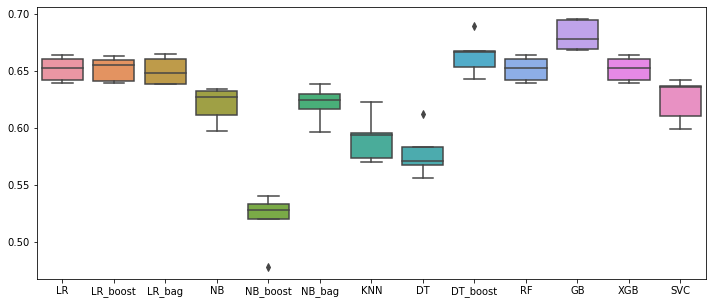

In [229]:
model_vis(names, scores)

In [257]:
scorecard = scorecards(names, be, ve, avg_roc_auc)

In [258]:
scorecard.sort_values(by = ['ROC_AUC', 'Bias Error', 'Variance Error'],
                      ascending = [False, True, True])

,Models,ROC_AUC,Bias Error,Variance Error
10,GB,0.679743,0.318320,0.012232
8,DT_boost,0.666372,0.336523,0.015577
1,LR_boost,0.654826,0.348607,0.009640
0,LR,0.652309,0.348577,0.009610
9,RF,0.652309,0.348577,0.009610
11,XGB,0.652309,0.348577,0.009610
2,LR_bag,0.650089,0.349975,0.009234
12,SVC,0.635660,0.375138,0.016766
3,NB,0.627394,0.379547,0.014120
5,NB_bag,0.623654,0.381152,0.013005


In [259]:
scorecard.sort_values(by = ['Variance Error', 'Bias Error'])

,Models,ROC_AUC,Bias Error,Variance Error
2,LR_bag,0.650089,0.349975,0.009234
0,LR,0.652309,0.348577,0.009610
9,RF,0.652309,0.348577,0.009610
11,XGB,0.652309,0.348577,0.009610
1,LR_boost,0.654826,0.348607,0.009640
10,GB,0.679743,0.318320,0.012232
5,NB_bag,0.623654,0.381152,0.013005
3,NB,0.627394,0.379547,0.014120
7,DT,0.585811,0.415074,0.015077
8,DT_boost,0.666372,0.336523,0.015577


#### ---------------------------------------------------

In [232]:
pca = PCA(n_components = 0.95)
xtr_pca = pd.DataFrame(pca.fit_transform(xtrain))
xtr_pca.shape

(11265, 15)

In [250]:
names, scores, be, ve, avg_roc_auc = model_score(models, xtr_pca, ytrain)

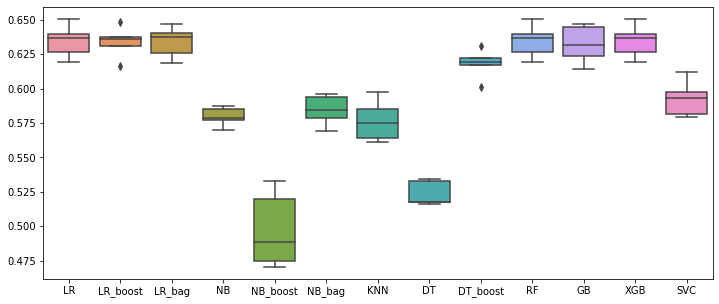

In [234]:
model_vis(names, scores)

In [251]:
scorecard = scorecards(names, be, ve, avg_roc_auc)

In [252]:
scorecard.sort_values(by = ['ROC_AUC', 'Bias Error', 'Variance Error'],
                      ascending = [False, True, True])

,Models,ROC_AUC,Bias Error,Variance Error
0,LR,0.634607,0.365393,0.010639
9,RF,0.634607,0.365393,0.010639
11,XGB,0.634607,0.365393,0.010639
1,LR_boost,0.633745,0.366255,0.010236
2,LR_bag,0.633531,0.366469,0.010791
10,GB,0.633037,0.366963,0.011840
8,DT_boost,0.618107,0.381893,0.009619
12,SVC,0.592727,0.407273,0.011983
5,NB_bag,0.585252,0.414748,0.008448
3,NB,0.579662,0.420338,0.006254


## -----------------------------------------------------------------------

In [268]:
lr = LogisticRegression(max_iter = 300)
lr_boost = AdaBoostClassifier(base_estimator = lr)
lr_bag = BaggingClassifier(base_estimator = lr)
dt_boost = AdaBoostClassifier()
rf = RandomForestClassifier(n_jobs = -1)
gb = GradientBoostingClassifier()
xgb = XGBClassifier(n_jobs = -1)
svc = SVC()
stack = StackingClassifier((('GB', gb), ('RF', rf), ('LR_boost', lr_boost)))
vote = VotingClassifier((('GB', gb), ('RF', rf), ('LR_boost', lr_boost)), voting = 'soft')

models = []
models.append(['LR', lr])
models.append(['LR_boost', lr_boost])
models.append(['LR_bag', lr_bag])
models.append(['DT_boost', dt_boost])
models.append(['RF', lr])
models.append(['GB', gb])
models.append(['XGB', lr])
models.append(['SVC', svc])
models.append(['Stack', stack])
models.append(['Vote', vote])

In [269]:
names, scores, be, ve, avg_roc_auc = model_score(models, inp, ytrain)

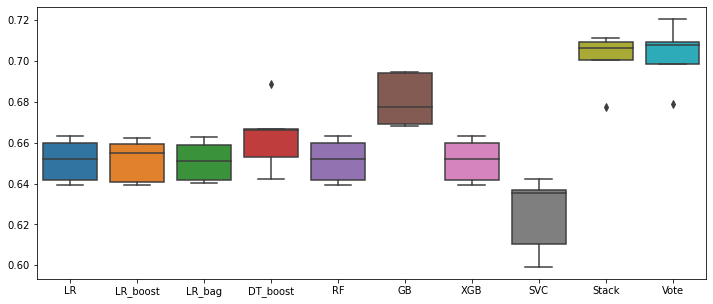

In [270]:
model_vis(names, scores)

In [271]:
scorecard = scorecards(names, be, ve, avg_roc_auc)

In [272]:
scorecard.sort_values(by = ['ROC_AUC', 'Bias Error', 'Variance Error'],
                      ascending = [False, True, True])

,Models,ROC_AUC,Bias Error,Variance Error
9,Vote,0.708103,0.296904,0.013970
8,Stack,0.706612,0.298963,0.012384
5,GB,0.677718,0.319198,0.011557
3,DT_boost,0.666372,0.336523,0.015577
1,LR_boost,0.654826,0.348607,0.009640
0,LR,0.652309,0.348577,0.009610
4,RF,0.652309,0.348577,0.009610
6,XGB,0.652309,0.348577,0.009610
2,LR_bag,0.651225,0.349021,0.008992
7,SVC,0.635660,0.375138,0.016766


In [273]:
scorecard.sort_values(by = ['Variance Error', 'Bias Error'])

,Models,ROC_AUC,Bias Error,Variance Error
2,LR_bag,0.651225,0.349021,0.008992
0,LR,0.652309,0.348577,0.009610
4,RF,0.652309,0.348577,0.009610
6,XGB,0.652309,0.348577,0.009610
1,LR_boost,0.654826,0.348607,0.009640
5,GB,0.677718,0.319198,0.011557
8,Stack,0.706612,0.298963,0.012384
9,Vote,0.708103,0.296904,0.013970
3,DT_boost,0.666372,0.336523,0.015577
7,SVC,0.635660,0.375138,0.016766


## ----------------------------------------------------------------------------

In [ ]:
## Stacking Classifier is working better

In [274]:
stack = StackingClassifier((('GB', gb), ('RF', rf), ('LR_boost', lr_boost)))
stack.fit(inp, ytrain)

StackingClassifier(estimators=(('GB', GradientBoostingClassifier()),
                               ('RF', RandomForestClassifier(n_jobs=-1)),
                               ('LR_boost',
                                AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=300)))))

In [276]:
inp_test = xtest[inp.columns]

In [277]:
ytr_pred = stack.predict(inp)
yts_pred = stack.predict(inp_test)

In [280]:
print(classification_report(ytrain, ytr_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10149
         1.0       1.00      0.99      0.99      1116

    accuracy                           1.00     11265
   macro avg       1.00      0.99      1.00     11265
weighted avg       1.00      1.00      1.00     11265



In [281]:
print(classification_report(ytest, yts_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4351
         1.0       0.73      0.08      0.14       478

    accuracy                           0.91      4829
   macro avg       0.82      0.54      0.55      4829
weighted avg       0.89      0.91      0.87      4829



## -------------------------------------------------------------------------

In [284]:
Y.value_counts()

0.0    14500
1.0     1594
Name: churn, dtype: int64

In [286]:
smote = SMOTE(sampling_strategy = {1 : 3000})
Xs, Ys = smote.fit_resample(X, Y)
Xs.shape, Ys.shape

((17500, 53), (17500,))

In [287]:
xtrain, xtest, ytrain, ytest = train_test_split(Xs, Ys, stratify = Ys, test_size = 0.3)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((12250, 53), (5250, 53), (12250,), (5250,))

In [288]:
# input for resampled data
inps = xtrain[inp.columns]

In [289]:
names, scores, be, ve, avg_roc_auc = model_score(models, inps, ytrain)

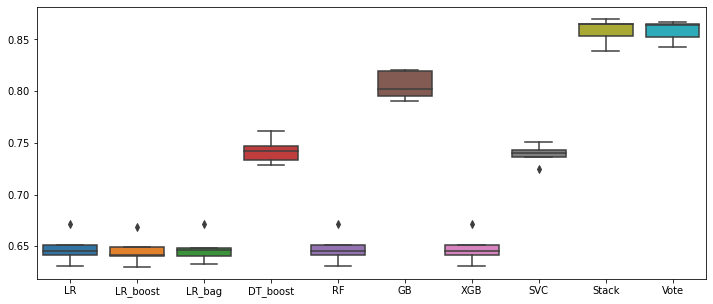

In [290]:
model_vis(names, scores)

In [291]:
scorecard = scorecards(names, be, ve, avg_roc_auc)

In [292]:
scorecard.sort_values(by = ['ROC_AUC', 'Bias Error', 'Variance Error'],
                      ascending = [False, True, True])

,Models,ROC_AUC,Bias Error,Variance Error
8,Stack,0.864654,0.141765,0.011036
9,Vote,0.863745,0.141983,0.009140
5,GB,0.802057,0.194489,0.012369
3,DT_boost,0.742536,0.257485,0.011426
7,SVC,0.739728,0.261274,0.008580
2,LR_bag,0.646145,0.352336,0.013122
0,LR,0.644892,0.351887,0.013289
4,RF,0.644892,0.351887,0.013289
6,XGB,0.644892,0.351887,0.013289
1,LR_boost,0.641375,0.353857,0.012900


In [293]:
scorecard.sort_values(by = ['Variance Error', 'Bias Error'])

,Models,ROC_AUC,Bias Error,Variance Error
7,SVC,0.739728,0.261274,0.008580
9,Vote,0.863745,0.141983,0.009140
8,Stack,0.864654,0.141765,0.011036
3,DT_boost,0.742536,0.257485,0.011426
5,GB,0.802057,0.194489,0.012369
1,LR_boost,0.641375,0.353857,0.012900
2,LR_bag,0.646145,0.352336,0.013122
0,LR,0.644892,0.351887,0.013289
4,RF,0.644892,0.351887,0.013289
6,XGB,0.644892,0.351887,0.013289


In [294]:
vote = VotingClassifier((('GB', gb), ('RF', rf), ('LR_boost', lr_boost)), voting = 'soft')
vote.fit(inps, ytrain)

VotingClassifier(estimators=(('GB', GradientBoostingClassifier()),
                             ('RF', RandomForestClassifier(n_jobs=-1)),
                             ('LR_boost',
                              AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=300)))),
                 voting='soft')

In [295]:
inps_test = xtest[inps.columns]

In [296]:
ytr_pred = stack.predict(inps)
yts_pred = stack.predict(inps_test)

In [297]:
print(classification_report(ytrain, ytr_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     10150
         1.0       0.99      0.46      0.63      2100

    accuracy                           0.91     12250
   macro avg       0.94      0.73      0.79     12250
weighted avg       0.91      0.91      0.89     12250



In [298]:
print(classification_report(ytest, yts_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4350
         1.0       0.99      0.46      0.63       900

    accuracy                           0.91      5250
   macro avg       0.95      0.73      0.79      5250
weighted avg       0.91      0.91      0.89      5250

